In [ ]:
# log(y) = 3.2 + 1.87*x
# 1. Slope interpretation: For one unit of increase in x, on average, y will increase 
#    by e^(1.87).
# 2. log(y) = 3.2 + 1.87*3.2 => log(y) = 9.184 => y = e^(9.184) = 9740.035

In [4]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf

hitters = pd.read_csv('Hitters.csv')
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
# Removing observations with NAs
hitters = hitters.dropna()
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


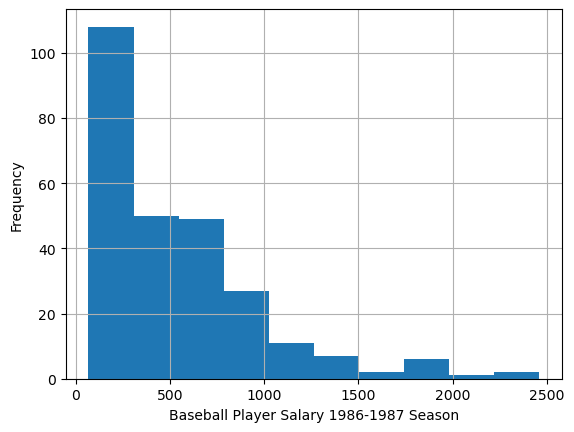

In [7]:
import matplotlib.pyplot as plt 

hitters['Salary'].hist();
plt.xlabel('Baseball Player Salary 1986-1987 Season')
plt.ylabel('Frequency');

In [8]:
# The distribution is right-skew.

In [9]:
hitters['log_Salary'] = np.log(hitters['Salary'])


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,log_Salary
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,6.163315
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,6.173786
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,6.214608
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,4.516339
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,A,W,282,421,25,750.0,A,6.620073


In [11]:
# Building the model 
lm_md = smf.ols(formula = 'log_Salary ~ AtBat + Hits + HmRun', data = hitters).fit()

# Defining the new observation
new_obs = pd.DataFrame({'AtBat': [600], 
                        'Hits': [220], 
                        'HmRun': [35]})

## Prediting log_Salary
np.exp(lm_md.predict(new_obs))

0    1733.382652
dtype: float64